# main.py

Default Notebook for working with the Fashion MNIST Dataset.
Single Load in, then Trial and Error possible.

In [7]:
### --- IMPORTS --- ###
# Standard Import
import os

# Own Import
from src import network
from src import loader
from src import drawer

# Third-Party Import
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
# NNFS
import nnfs
nnfs.init()

In [24]:
### Hyperparameters
EPOCHS = 12
BATCH_SIZE = 64

In [25]:
### Labels
fashion_mnist_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [6]:
### Load Data (run get_mnist.py before executing this for first time)
print("% Start Loading Data")
X, y, X_test, y_test = loader.create_data_mnist('fashion_mnist_images')
print("% Successfully loaded Data", "\n")


print("% Preprocess Data")
# Shuffle Data
keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)
X = X[keys]
y = y[keys]

# Scale and Shape Data
X = X.reshape(X.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

X = (X.astype(np.float32) - 127.5) / 127.5
X_test = (X_test.astype(np.float32) - 127.5) / 127.5

print("% Successfully preprocessed Data", "\n")

% Start Loading Data
% Successfully loaded Data 

% Preprocess Data
% Successfully preprocessed Data 



In [70]:
### Neural Network
# Init Model
model = network.Model()

model.add(network.layers.Layer_Dense(X.shape[1], 128))
model.add(network.activation_functions.Activation_ReLU())

model.add(network.layers.Layer_Dense(128, 64, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4))
model.add(network.activation_functions.Activation_ReLU())

model.add(network.layers.Layer_Dense(64, 32, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4))
model.add(network.activation_functions.Activation_ReLU())

model.add(network.layers.Layer_Dense(32, 16, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4))
model.add(network.activation_functions.Activation_ReLU())

model.add(network.layers.Layer_Dense(16, 8, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4))
model.add(network.activation_functions.Activation_ReLU())

model.add(network.layers.Layer_Dense(8, 4, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4))
model.add(network.activation_functions.Activation_ReLU())

model.add(network.layers.Layer_Dense(4, 8, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4))
model.add(network.activation_functions.Activation_ReLU())

model.add(network.layers.Layer_Dense(8, 16, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4))
model.add(network.activation_functions.Activation_ReLU())

model.add(network.layers.Layer_Dense(16, 32, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4))
model.add(network.activation_functions.Activation_ReLU())

model.add(network.layers.Layer_Dense(32, 64, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4))
model.add(network.activation_functions.Activation_ReLU())

model.add(network.layers.Layer_Dense(64, 128, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4))
model.add(network.activation_functions.Activation_ReLU())

model.add(network.layers.Layer_Dense(128, X.shape[1]))
model.add(network.activation_functions.Activation_Sigmoid())

model.set(
    loss = network.loss_functions.Loss_MeanSquaredError(),
    optimizer = network.optimizers.Optimizer_Adam(learning_rate=0.01, decay=5e-7),
    accuracy=network.accuracy.Accuracy_Regression()
)

model.finalize()

In [71]:
model.train(X, X, validation_data=(X_test, X_test),
    epochs = EPOCHS,
    batch_size=BATCH_SIZE,
    print_every = 100
)

model.save('autoencoder.model')

epoch: 1
step: 0, acc: 0.003, loss: 1.507 (data_loss: 1.396, reg_loss: 0.111), lr: 0.01
step: 100, acc: 0.000, loss: 0.700 (data_loss: 0.695, reg_loss: 0.005), lr: 0.00999950002499875
step: 200, acc: 0.000, loss: 0.692 (data_loss: 0.690, reg_loss: 0.003), lr: 0.009999000099990002
step: 300, acc: 0.000, loss: 0.692 (data_loss: 0.690, reg_loss: 0.002), lr: 0.009998500224966254
step: 400, acc: 0.000, loss: 0.687 (data_loss: 0.686, reg_loss: 0.001), lr: 0.009998000399920017
step: 468, acc: 0.000, loss: 0.676 (data_loss: 0.675, reg_loss: 0.001), lr: 0.0099976605474319

training, acc: 0.007, loss: 0.692 (data_loss: 0.691, reg_loss: 0.001), lr: 0.0099976605474319
validation: acc: 0.000, loss: 0.675

epoch: 2
step: 0, acc: 0.000, loss: 0.684 (data_loss: 0.683, reg_loss: 0.001), lr: 0.009997655549773578
step: 100, acc: 0.000, loss: 0.696 (data_loss: 0.695, reg_loss: 0.001), lr: 0.00999715580917229
step: 200, acc: 0.000, loss: 0.690 (data_loss: 0.689, reg_loss: 0.001), lr: 0.009996656118528353
s

KeyboardInterrupt: 

46448


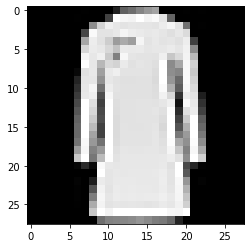

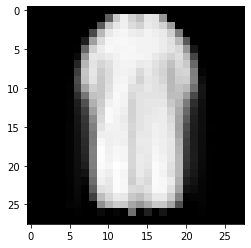

In [69]:
j = np.random.randint(1, 50000)

print(j)

X_pred = model.predict(X[j])

plt.imshow(X[j].reshape(28, 28), cmap='gray')
plt.show()
plt.imshow(X_pred.reshape(28, 28), cmap='gray')
plt.show()